# Introduction

In machine learning, every estimator has its advantages and drawbacks. The generalization error of an estimator can be decomposed into bias, variance, and noise. The bias of an estimator is the average error for different training sets, while the variance indicates its sensitivity to varying training sets. Noise is a property of the data.

In this lab, we will explore how to use validation curves to evaluate the performance of machine learning models. Validation curves allow us to plot the influence of a single hyperparameter on the training score and the validation score, helping us determine if the model is overfitting or underfitting for different hyperparameter values.

# Import the Required Libraries and Load the Data

Let's start by importing the necessary libraries and loading a dataset. In this example, we will use the Iris dataset.

In [1]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
X, y = load_iris(return_X_y=True)

# Shuffle the Data

To ensure randomness in our analysis, let's shuffle the order of the samples in our dataset.

In [2]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Plot the Validation Curve

Now, let's plot the validation curve using the **validation_curve** function. We will use the **Ridge** estimator and vary the **alpha** hyperparameter over a range of values.

In [3]:
param_range = np.logspace(-7, 3, 3)
train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name='alpha', param_range=param_range, cv=5
)

In [4]:
train_scores

array([[0.93402178, 0.94366418, 0.92648383, 0.91933313, 0.92922507],
       [0.9340217 , 0.94366412, 0.92648377, 0.91933304, 0.929225  ],
       [0.51143526, 0.52415737, 0.49868907, 0.47086988, 0.49623503]])

In [5]:
valid_scores

array([[0.9055033 , 0.84185935, 0.94569793, 0.96231017, 0.93366144],
       [0.90550088, 0.84184574, 0.94568969, 0.96233172, 0.93366806],
       [0.46706558, 0.25698974, 0.50496293, 0.49826404, 0.52500014]])

If you intend to plot the validation curves only, the class **ValidationCurveDisplay** is more direct than using matplotlib manually on the results of a call to **validation_curve**. You can use the method **from_estimator** similarly to **validation_curve** to generate and plot the validation curve:

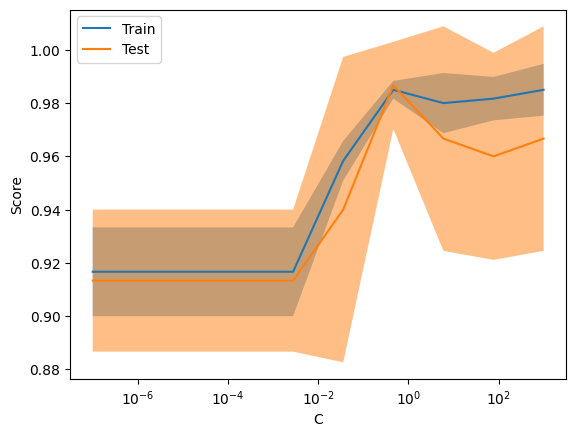

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible.

# Learning curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. Consider the following example where we plot the learning curve of a naive Bayes classifier and an SVM.

For the naive Bayes, both the validation score and the training score converge to a value that is quite low with increasing size of the training set. Thus, we will probably not benefit much from more training data.

In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

We can use the function **learning_curve** to generate the values that are required to plot such a learning curve (number of samples that have been used, the average scores on the training sets and the average scores on the validation sets):

In [8]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

If you intend to plot the learning curves only, the class **LearningCurveDisplay** will be easier to use. You can use the method **from_estimator** similarly to **learning_curve** to generate and plot the learning curve:

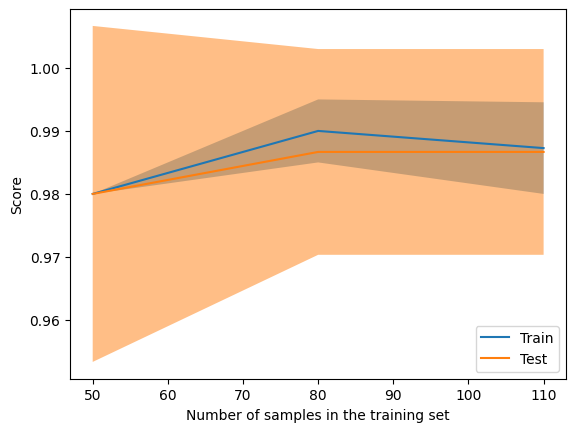

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

# Summary

In this lab, we explored the concept of validation curves and how they can be used to evaluate machine learning models. By plotting the training score and the validation score for different hyperparameter values, we can determine if a model is overfitting or underfitting. This information helps us select the best hyperparameters for our models and improve their performance.